# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Load Data from U.S. Fish & Wildlife Service

In [2]:
species = pd.read_pickle("../Data/FWS.pkl")
species.head()

,Family,Group,Region,Federal Listing Status,VIP,State
0,Accipitridae,Birds,2,Not Listed,V,AL
1,Acipenseridae,Fishes,3,Not Listed,V,AL
2,Acipenseridae,Fishes,4,Threatened,V,AL
3,Sericostomatidae,Insects,4,Not Listed,I,AL
4,Rosaceae,Flowering Plants,4,Not Listed,P,AL


In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 13390
Data columns (total 6 columns):
Family                    5475 non-null object
Group                     5475 non-null object
Region                    5475 non-null object
Federal Listing Status    5475 non-null object
VIP                       5475 non-null object
State                     5475 non-null object
dtypes: object(6)
memory usage: 299.4+ KB


In [4]:
species.describe()

,Family,Group,Region,Federal Listing Status,VIP,State
count,5475,5475,5475,5475,5475,5475
unique,571,20,9,3,3,50
top,Orchidaceae,Flowering Plants,4,Not Listed,P,CA
freq,140,2213,1536,3859,2359,411


### Target Distribution

Not Listed    3859
Endangered     917
Threatened     699
Name: Federal Listing Status, dtype: int64
Endangered: 0.16748858447488585
Not Listed: 0.7048401826484019
Threatened: 0.12767123287671234


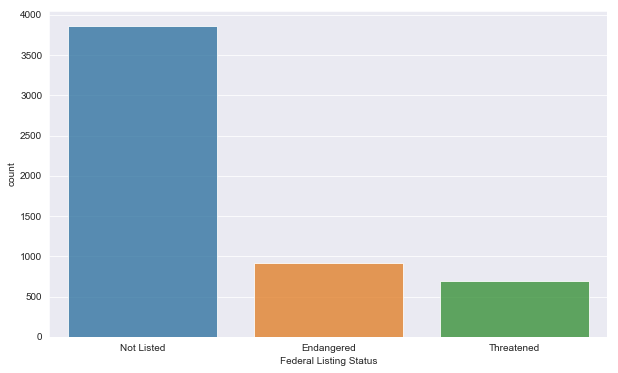

In [5]:
# federal listing status
print(species['Federal Listing Status'].value_counts())
print('Endangered: ' + str((species['Federal Listing Status'] == 'Endangered').sum() / species.shape[0]))
print('Not Listed: ' + str((species['Federal Listing Status'] == 'Not Listed').sum() / species.shape[0]))
print('Threatened: ' + str((species['Federal Listing Status'] == 'Threatened').sum() / species.shape[0]))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(species['Federal Listing Status'],
              order=species['Federal Listing Status'].value_counts().index,
              alpha=0.8)

### Feature Distribution

In [6]:
# species families
print(species['Family'].value_counts())

# percentage
print(species['Family'].value_counts()/species['Family'].value_counts().sum())

Orchidaceae          140
Unionidae            128
Vespertilionidae     124
Asteraceae           109
Fabaceae             107
Cyperaceae            96
Cyprinidae            94
Scrophulariaceae      92
Brassicaceae          86
Rallidae              70
Poaceae               70
Accipitridae          69
Salmonidae            65
Laridae               65
Lycaenidae            63
Nymphalidae           62
Ranunculaceae         60
Liliaceae             59
Rosaceae              58
Scolopacidae          58
Noctuidae             57
Caryophyllaceae       57
Emberizidae           55
Acipenseridae         53
Percidae              52
Malvaceae             51
Apiaceae              50
Catostomidae          48
Lamiaceae             48
Primulaceae           46
                    ... 
Lepidoziaceae          1
cyprinidae             1
Tenebrionidae          1
Gyrinidae              1
Ctenizidae             1
Chrysopidae            1
Threskiornithidae      1
Phaloniidae            1
Proterhinidae          1


Flowering Plants            2213
Insects                      775
Birds                        655
Fishes                       442
Mammals                      441
Reptiles                     229
Snails                       166
Clams                        146
Ferns and Allies             110
Crustaceans                  109
Amphibians                   108
Arachnids                     28
Lichens                       24
Conifers and Cycads           12
Flatworms and Roundworms       6
Sponges                        5
Annelid Worms                  3
Millipedes                     1
Hydroids                       1
Corals                         1
Name: Group, dtype: int64
Flowering Plants            0.404201
Insects                     0.141553
Birds                       0.119635
Fishes                      0.080731
Mammals                     0.080548
Reptiles                    0.041826
Snails                      0.030320
Clams                       0.026667
Ferns and Allies  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

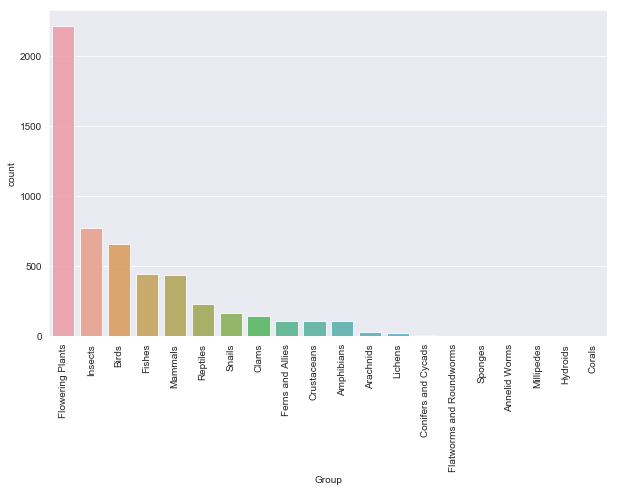

In [7]:
# species groups
print(species['Group'].value_counts())

# percentage
print(species['Group'].value_counts()/species['Group'].value_counts().sum())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Group'],
              order=species['Group'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

4       1536
3        857
1        806
5        724
2        630
6        563
8        269
7         51
NMFS      39
Name: Region, dtype: int64
4       0.280548
3       0.156530
1       0.147215
5       0.132237
2       0.115068
6       0.102831
8       0.049132
7       0.009315
NMFS    0.007123
Name: Region, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

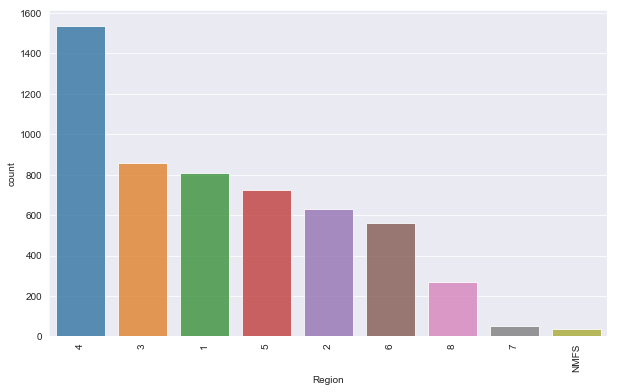

In [11]:
# lead geographic regions
print(species['Region'].value_counts())

# percentage
print(species['Region'].value_counts()/species['Region'].value_counts().sum())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Region'],
              order=species['Region'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

P    2359
V    1875
I    1241
Name: VIP, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

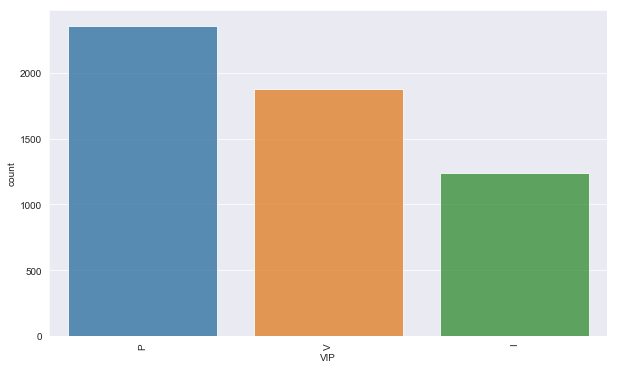

In [9]:
# vertebrate / invertebrate / plants
print(species['VIP'].value_counts())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['VIP'],
              order=species['VIP'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

CA    411
FL    234
TX    222
HI    212
NC    210
AL    189
AZ    188
GA    176
VA    160
OR    157
TN    150
NV    142
UT    139
NM    138
SC    133
AR    118
CO    115
MO    114
WA    108
KY    104
MS    102
IL     99
NY     98
OH     93
PA     90
IN     89
LA     88
WV     87
OK     81
ID     80
MI     78
WI     77
MD     75
MT     71
MN     70
WY     68
NJ     66
DE     65
KS     64
MA     62
IA     61
ME     56
AK     54
NH     47
NE     46
CT     44
SD     43
VT     40
RI     31
ND     30
Name: State, dtype: int64
CA    0.075068
FL    0.042740
TX    0.040548
HI    0.038721
NC    0.038356
AL    0.034521
AZ    0.034338
GA    0.032146
VA    0.029224
OR    0.028676
TN    0.027397
NV    0.025936
UT    0.025388
NM    0.025205
SC    0.024292
AR    0.021553
CO    0.021005
MO    0.020822
WA    0.019726
KY    0.018995
MS    0.018630
IL    0.018082
NY    0.017900
OH    0.016986
PA    0.016438
IN    0.016256
LA    0.016073
WV    0.015890
OK    0.014795
ID    0.014612
MI    0.014247
WI    0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

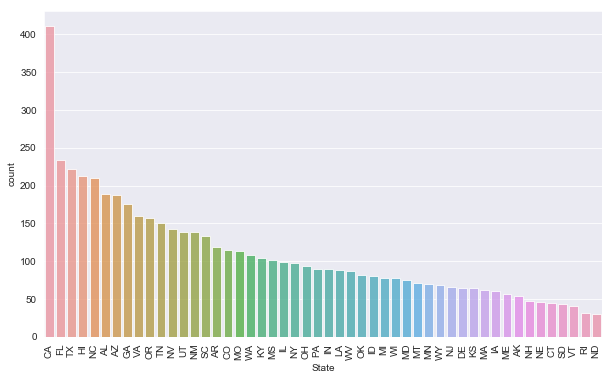

In [10]:
# states
print(species['State'].value_counts())

# percentage
print(species['State'].value_counts()/species['State'].value_counts().sum())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['State'],
              order=species['State'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)